#Libraries

In [1]:
pip install transformers

In [2]:
import torch
import pandas as pd
from transformers import BertTokenizer
from torch.utils.data import Dataset, DataLoader
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from tqdm import tqdm

#Dataset

In [3]:
from google.colab import drive
drive.mount('//content//drive')

Mounted at //content//drive


In [4]:
df=pd.read_excel("/content/drive/MyDrive/DS_CSE 438/Dataset/UrduDataset/Urdu Tweets Dataset.xlsx")

#Overview Of Dataset


In [5]:
df

Id  \
0        1313165582020349952   
1        1314653586509488128   
2        1311404383071067904   
3        1313508198876433920   
4        1313510191405596928   
...                      ...   
1047995  1318648984609632000   
1047996  1318648980243418880   
1047997  1318648979031233024   
1047998  1318648969644356096   
1047999  1318648969166266112   

                                                      Text  \
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...   
1         - '' üçÄ üåæ üå¥ '' - Ô∫çÔÆ¨Ô∫™ŸêÔªßŸéÔ∫éÔªüÔ∫ºŸêŸëÔ∫ÆŸéÔ∫çÔªÅŸé Ô∫çŸéÔªüÔª§ŸèÔ∫¥Ô∫òŸéÔªòŸêÔØøÔª¢...   
2           üíï ŸÖ€å⁄∫ ŸÜ€Å€å⁄∫ ⁄©ÿ±ÿ™€å ÿßŸèÿ≥ ⁄©ÿß ÿ∞⁄©ÿ± ⁄©ÿ≥€å ÿ™€åÿ≥ÿ±€í ⁄©€í ÿ≥ÿßÿ™...   
3          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...   
4          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...   
...                                                    ...   
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ   
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...   
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...   
1047998  ÿÆÿßŸÜ ÿµÿßÿ≠ÿ® ÿ¢Ÿæ ÿµÿ±ŸÅ ŸÖ€ÅŸÜ⁄Øÿßÿ¶€å Ÿæÿ± ÿ™Ÿàÿ¨€Å ÿØ€å⁄∫ ÿßŸÜ ÿßŸæŸàÿ≤€åÿ¥ŸÜ...   
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...   

                                                  Emotions Category  
0               ['SMILING FACE WITH SMILING EYES , 0.644']      Joy  
1        ['HEAVY BLACK HEART , 0.746', 'SPARKLES , 0.35...      NaN  
2                                   ['TWO HEARTS , 0.632']      NaN  
3                                         ['HERB , 0.384']      NaN  
4                                         ['HERB , 0.384']      NaN  
...                                                    ...      ...  
1047995                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  
1047996                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  
1047997  ['PERSON RAISING BOTH HANDS IN CELEBRATION , 0...  ['Joy']  
1047998                          ['FLEXED BICEPS , 0.555']      NaN  
1047999                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  

[1048000 rows x 4 columns]

In [6]:
df1=df

In [7]:
df2= df1.shape
df2

(1048000, 4)

#Data Preprocessing

In [ ]:
df1

Id  \
0        1313165582020349952   
1        1314653586509488128   
2        1311404383071067904   
3        1313508198876433920   
4        1313510191405596928   
...                      ...   
1047995  1318648984609632000   
1047996  1318648980243418880   
1047997  1318648979031233024   
1047998  1318648969644356096   
1047999  1318648969166266112   

                                                      Text  \
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...   
1         - '' üçÄ üåæ üå¥ '' - Ô∫çÔÆ¨Ô∫™ŸêÔªßŸéÔ∫éÔªüÔ∫ºŸêŸëÔ∫ÆŸéÔ∫çÔªÅŸé Ô∫çŸéÔªüÔª§ŸèÔ∫¥Ô∫òŸéÔªòŸêÔØøÔª¢...   
2           üíï ŸÖ€å⁄∫ ŸÜ€Å€å⁄∫ ⁄©ÿ±ÿ™€å ÿßŸèÿ≥ ⁄©ÿß ÿ∞⁄©ÿ± ⁄©ÿ≥€å ÿ™€åÿ≥ÿ±€í ⁄©€í ÿ≥ÿßÿ™...   
3          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...   
4          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...   
...                                                    ...   
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ   
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...   
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...   
1047998  ÿÆÿßŸÜ ÿµÿßÿ≠ÿ® ÿ¢Ÿæ ÿµÿ±ŸÅ ŸÖ€ÅŸÜ⁄Øÿßÿ¶€å Ÿæÿ± ÿ™Ÿàÿ¨€Å ÿØ€å⁄∫ ÿßŸÜ ÿßŸæŸàÿ≤€åÿ¥ŸÜ...   
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...   

                                                  Emotions Category  
0               ['SMILING FACE WITH SMILING EYES , 0.644']      Joy  
1        ['HEAVY BLACK HEART , 0.746', 'SPARKLES , 0.35...      NaN  
2                                   ['TWO HEARTS , 0.632']      NaN  
3                                         ['HERB , 0.384']      NaN  
4                                         ['HERB , 0.384']      NaN  
...                                                    ...      ...  
1047995                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  
1047996                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  
1047997  ['PERSON RAISING BOTH HANDS IN CELEBRATION , 0...  ['Joy']  
1047998                          ['FLEXED BICEPS , 0.555']      NaN  
1047999                 ['FACE WITH TEARS OF JOY , 0.221']  ['Joy']  

[1048000 rows x 4 columns]

In [8]:
df3 = df1.drop('Emotions', axis=1)

In [9]:
df3

Id  \
0        1313165582020349952   
1        1314653586509488128   
2        1311404383071067904   
3        1313508198876433920   
4        1313510191405596928   
...                      ...   
1047995  1318648984609632000   
1047996  1318648980243418880   
1047997  1318648979031233024   
1047998  1318648969644356096   
1047999  1318648969166266112   

                                                      Text Category  
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...      Joy  
1         - '' üçÄ üåæ üå¥ '' - Ô∫çÔÆ¨Ô∫™ŸêÔªßŸéÔ∫éÔªüÔ∫ºŸêŸëÔ∫ÆŸéÔ∫çÔªÅŸé Ô∫çŸéÔªüÔª§ŸèÔ∫¥Ô∫òŸéÔªòŸêÔØøÔª¢...      NaN  
2           üíï ŸÖ€å⁄∫ ŸÜ€Å€å⁄∫ ⁄©ÿ±ÿ™€å ÿßŸèÿ≥ ⁄©ÿß ÿ∞⁄©ÿ± ⁄©ÿ≥€å ÿ™€åÿ≥ÿ±€í ⁄©€í ÿ≥ÿßÿ™...      NaN  
3          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...      NaN  
4          .üåø.. Ô¥ø⁄©€í ŸÖ€åÿ¥ŸàÿØ ÿ™ŸÖÿßŸÖŸê ÿ¨ŸÄŸáÿßŸÜ ÿ≥ŸÄŸà€íŸê ⁄©ÿ±ÿ®ŸÄŸÑÿß ÿ®ÿß ⁄©...      NaN  
...                                                    ...      ...  
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ  ['Joy']  
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...  ['Joy']  
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...  ['Joy']  
1047998  ÿÆÿßŸÜ ÿµÿßÿ≠ÿ® ÿ¢Ÿæ ÿµÿ±ŸÅ ŸÖ€ÅŸÜ⁄Øÿßÿ¶€å Ÿæÿ± ÿ™Ÿàÿ¨€Å ÿØ€å⁄∫ ÿßŸÜ ÿßŸæŸàÿ≤€åÿ¥ŸÜ...      NaN  
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...  ['Joy']  

[1048000 rows x 3 columns]

In [10]:
dfmissing_values = df3.isna().sum()

In [11]:
dfmissing_values

Id               0
Text             0
Category    514571
dtype: int64

In [12]:
df4 = df3.dropna()
df4

Id  \
0        1313165582020349952   
19       1313508822825263104   
29       1309937523020440064   
35       1313551779561443072   
47       1313448648932457984   
...                      ...   
1047994  1318648987264712960   
1047995  1318648984609632000   
1047996  1318648980243418880   
1047997  1318648979031233024   
1047999  1318648969166266112   

                                                      Text   Category  
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...        Joy  
19         Best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...  Joy , Joy  
29       ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...        Joy  
35                                  ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß        Sad  
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...        Joy  
...                                                    ...        ...  
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...    ['Joy']  
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ    ['Joy']  
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...    ['Joy']  
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...    ['Joy']  
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...    ['Joy']  

[533429 rows x 3 columns]

In [13]:
df5 = df4.drop('Id', axis=1)
df5

Text   Category
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...        Joy
19         Best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...  Joy , Joy
29       ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...        Joy
35                                  ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß        Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...        Joy
...                                                    ...        ...
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...    ['Joy']
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ    ['Joy']
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...    ['Joy']
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...    ['Joy']
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...    ['Joy']

[533429 rows x 2 columns]

In [14]:
def most_common_word(lst):
    if type(lst) == list:
      from collections import Counter
      word_count = Counter(lst)
      return max(word_count, key=word_count.get)
    else:
      return lst.split(',')[0]
df5['Category'] = df5['Category'].apply(most_common_word)
df5.head(60)

Text  Category
0         .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...       Joy
19     Best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...      Joy 
29   ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...       Joy
35                              ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad
47   Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy
48   '' '' ÿ≠Ÿäÿßÿ° ÿßŸàÿ± ÿ¥ÿ±ŸÖ ÿßŸÜ ⁄©ÿß Ÿæÿ±ÿØ€Åÿåÿå ÿßŸÜ ⁄©€å ÿ≤ŸäŸÜÿ™ €Å€íüíñ...       Joy
51   '' ÿßŸæŸÜ€í ŸÖÿ≠ÿ®ÿ™ ⁄©ÿ±ŸÜ€í ŸàÿßŸÑŸà⁄∫ ÿ≥€í ÿßÿ™ŸÜ€å ÿ¥⁄©ÿß€åÿ™€å⁄∫ ŸÜ€Å ÿ±⁄©⁄æ...       Joy
54   '' ÿßŸàÿ± ÿÆÿØÿß ÿ¨ÿ® ⁄©ÿ≥€å ⁄©Ÿà ŸÖÿπÿßŸÅ ⁄©ÿ±ÿ™ÿß €Å€í ÿ™Ÿà ŸÜŸÖÿßÿ≤ Ÿæ⁄ë⁄æŸÜ...       Joy
55   '' ÿßŸàÿ± ÿÆÿØÿß ÿ¨ÿ® ⁄©ÿ≥€å ⁄©Ÿà ŸÖÿπÿßŸÅ ⁄©ÿ±ÿ™ÿß €Å€í ÿ™Ÿà ŸÜŸÖÿßÿ≤ Ÿæ⁄ë⁄æŸÜ...       Joy
60   '' ÿ™€åÿ±€å ÿ¥€Åÿ±ÿ™ ŸÜ€Å€å⁄∫ ÿπÿ≤ÿ™ ÿπÿ≤€åÿ≤ €Å€í ŸÖÿ¨⁄æ ⁄©Ÿàÿå ⁄©ÿ® ÿßŸæŸÜ€å ...       Joy
62   '' ÿÆŸàÿ¥€åÿß⁄∫ ÿ™ŸÇÿØ€åÿ± ŸÖ€å⁄∫ €ÅŸàŸÜ€å ⁄Üÿß€Å€å€í ÿ™ÿµŸà€åÿ± ŸÖ€å⁄∫ ÿ™Ÿà €Åÿ±...       Joy
67   '' ÿπŸàÿ±ÿ™Ÿà⁄∫ ŸÖ€å⁄∫ ÿß⁄© ⁄Ü€åÿ≤ ÿ≠€åÿ±ÿßŸÜ ⁄©ŸÜ ⁄æ€í ⁄©€Å Ÿæ€åÿßÿ± ÿ≥€í ÿ®ŸÑ...       Joy
69   '' ⁄©ÿ™ŸÜ€å Ÿæ€åÿßÿ±€å ⁄ØŸàÿß€Å€å €Å€í '' ÿßŸéÿ¥ŸíŸáŸéÿØŸè ÿßŸéŸÜŸéŸë ŸÖŸèÿ≠ŸéŸÖ...       Joy
76   '' ŸÖ€å⁄∫ ŸÜ€í ⁄©€Åÿß ÿ¨Ÿà ŸÖ€å⁄∫ ⁄Üÿß€Åÿ™ÿß €ÅŸà⁄∫ Ÿà€Å ŸÖÿ¨⁄æ€í ŸÜ€Å€å⁄∫ ŸÖŸÑ...       Joy
78   '' €ÅŸÖÿßÿ±€í ŸÖÿπÿßŸÖŸÑÿßÿ™ €ÅŸÖÿßÿ±€í ÿßÿÆÿ™€åÿßÿ± ŸÖ€å⁄∫ ŸÜ€Å€å⁄∫ €ÅŸàÿ™€í ŸÖ⁄Ø...       Joy
91   ' ÿ¨ÿßŸÜÿ™€í €ÅŸà ÿÆŸàÿ¥ ŸÇÿ≥ŸÖÿ™€å ⁄©€åÿß €Å€íÿüüòç ÿØŸÜ€åÿß ŸÖ€å⁄∫ ÿßÿ™ŸÜ€í ŸÖÿ∞...       Joy
97   ' ŸÖ€åÿ±€í ŸÜÿ®€å ⁄©ÿß ⁄Ü€Åÿ±€Å ÿßÿ™ŸÜÿß ŸÜŸàÿ±ÿßŸÜ€å €Å€í üòá ÿ®ŸÜÿß ÿØ€å⁄©⁄æ€í ...       Joy
102             'ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸéŸëŸÄ€ÅÔ£ø‚Ä¢üòπüíî ÔÆºÿåÿå ÔÆº       Joy
113  -ŸÖ€åÿ±€å €ÅŸà ÿß€å ŸÜ€Å ÿ¨ÿß€ìüòÇ ŸÖ€å⁄∫ ÿ®ŸàŸÑÿ™€å ŸÅÿßÿ¶ŸÜ ŸÜ€Å€å⁄∫ €ÅŸà⁄∫ ÿßŸà...       Joy
114                                             -ŸÜ€Å€å üòí  Disgust 
117  ‚Äî `` ÿ≠ÿßŸÑÿßÿ™ ⁄©Ÿàÿ¶€å ÿ®⁄æ€å €ÅŸà⁄∫ ‚Äù ÿ¥⁄©ÿ± ‚Äú €ÅŸÖ€åÿ¥€Å ÿ¥Ÿê⁄©Ÿà€í ÿ≥€í...       Joy
126  ·∑ÇŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...       Sad
127  ·∑ÇŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...       Sad
128  ·∑ÇŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...       Joy
129  ŸéŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...       Joy
132     Ÿèÿßÿ≥€í €ÅŸÜÿ≥ŸÜÿß Ÿæÿ≥ŸÜÿØ €Å€í€î ÿßŸàÿ± ŸÖÿ¨⁄æ€í €ÅŸÜÿ≥ÿ™€å €ÅŸàÿ¶€å Ÿà€Å€îüñ§ üòÇ       Joy
133  ŸèŸæ€ÅŸÜ⁄Ü€í €Å€å⁄∫ ⁄©ÿ±ÿ®ŸÑÿß ŸÖ€å⁄∫ ÿ≥Ÿéÿ®⁄æ€Å€å ÿ≤ÿßÿ¶ÿ±€åŸÜ ŸÖ⁄Øÿ± ÿßŸê⁄© ŸÖ€å⁄∫...       Sad
134                               Ÿèÿ¨⁄Ø Ÿèÿ¨⁄Ø ÿ¨€åŸà ÿ®€ÅŸÜ ÿ¨€åüòÑüòÑ       Joy
138     ŸíÔÆ©ÔÆ´ŸÄÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ÔÆ´ŸÄÔÆ©ŸÄŸÄ€ΩüïäŸë‡Ø∏üèåüèª‚Äç‚ôÇüòπ‚ô•Ô∏è÷Ü       Joy
143   ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ...       Joy
165   '' ÿßÿ® ŸÖÿ¨⁄æ€í ⁄©Ÿàÿ¶€å ÿ≥⁄©€åŸÜ€Å ÿ≥ ŸÜ€Å€å⁄∫ ⁄©€Åÿ™ÿß ÿ®ÿßÿ®ÿß '' _üíîüò≠...       Sad
166   '' ÿßŸæŸÜ€í ŸÖÿ≠ÿ®ÿ™ ⁄©ÿ±ŸÜ€í ŸàÿßŸÑŸà⁄∫ ÿ≥€í ÿßÿ™ŸÜ€å ÿ¥⁄©ÿß€åÿ™€å⁄∫ ŸÜ€Å ÿ±⁄©...       Joy
177   '' ÿßŸÑŸÑ€Å ÿ™ÿπÿßŸÑ€åŸ∞ ÿßŸæŸÜ€í ÿ®ŸÜÿØ€í ⁄©€å ÿ™⁄ëŸæ ⁄©ÿ®⁄æ€å ÿ∂ÿßÿ¶ÿπ ŸÜ€Å€å...       Joy
178   '' ÿßŸÑŸÑ€Å ÿ™ÿπÿßŸÑ€åŸ∞ ÿßŸæŸÜ€í ÿ®ŸÜÿØ€í ⁄©€å ÿ™⁄ëŸæ ⁄©ÿ®⁄æ€å ÿ∂ÿßÿ¶ÿπ ŸÜ€Å€å...       Joy
179   '' ÿßŸÑŸÑ€Å ÿ™ÿπÿßŸÑ€åŸ∞ ÿßŸæŸÜ€í ÿ®ŸÜÿØ€í ⁄©€å ÿ™⁄ëŸæ ⁄©ÿ®⁄æ€å ÿ∂ÿßÿ¶ÿπ ŸÜ€Å€å...       Joy
188   '' ÿßŸàÿ± ÿÆÿØÿß ÿ¨ÿ® ⁄©ÿ≥€å ⁄©Ÿà ŸÖÿπÿßŸÅ ⁄©ÿ±ÿ™ÿß €Å€í ÿ™Ÿà ŸÜŸÖÿßÿ≤ Ÿæ⁄ë⁄æ...       Joy
189   '' ÿßŸàÿ± ÿÆÿØÿß ÿ¨ÿ® ⁄©ÿ≥€å ⁄©Ÿà ŸÖÿπÿßŸÅ ⁄©ÿ±ÿ™ÿß €Å€í ÿ™Ÿà ŸÜŸÖÿßÿ≤ Ÿæ⁄ë⁄æ...       Joy
191   '' ÿßŸàÿ±ÿßŸÑŸÑ€Å ⁄©€í ÿ≥Ÿàÿß ŸÜ€Å ⁄©Ÿàÿ¶€å ÿ™ŸÖ€Åÿßÿ±ÿß ÿ≥⁄Üÿß ÿØŸàÿ≥ÿ™ €Å€í ...       Joy
198   '' ÿß€í €ÅŸÖÿßÿ±€í Ÿæ€åÿßÿ±€í Ÿæÿ±ŸàÿØ⁄Øÿßÿ±ÿå €ÅŸÖÿßÿ±€å ŸÇÿ≥ŸÖÿ™ ŸÖ€å⁄∫ ⁄©Ÿàÿ¶...       Joy
200   '' ÿß€å⁄© ÿ±ÿßÿ™ ÿß€åÿ≥€å ÿ®⁄æ€å ÿ¢ÿ¶€í ⁄Ø€å 

In [15]:
unique_words = df5['Category'].str.split().explode().unique()

# Convert the result to a list for easier inspection
unique_words_list = unique_words.tolist()
print(unique_words_list)


['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice', "['Angry']", "['Joy']", "['Joy'", "['Disgust']", "['Sad']", "['Sad'", "['Fear']", "['Surprice']", "['Disgust'", "['Angry'", "['Surprice'", "['Fear'"]


In [16]:
df6=df5

In [17]:
df6['Category'] = df6['Category'].str.replace(r"\['Angry'\]", "Angry")
df6['Category'] = df6['Category'].str.replace(r"\['Joy'\]", "Joy")
df6['Category'] = df6['Category'].str.replace(r"\['Joy'", "Joy")
df6['Category'] = df6['Category'].str.replace(r"\['Disgust'\]", "Disgust")
df6['Category'] = df6['Category'].str.replace(r"\['Sad'\]", "Sad")
df6['Category'] = df6['Category'].str.replace(r"\['Sad'", "Sad")
df6['Category'] = df6['Category'].str.replace(r"\['Fear'\]", "Fear")
df6['Category'] = df6['Category'].str.replace(r"\['Surprice'\]", "Surprice")
df6['Category'] = df6['Category'].str.replace(r"\['Disgust'", "Disgust")
df6['Category'] = df6['Category'].str.replace(r"\['Angry'", "Angry")
df6['Category'] = df6['Category'].str.replace(r"\['Surprice'", "Surprice")
df6['Category'] = df6['Category'].str.replace(r"\['Fear'", "Fear")


<ipython-input-17-3d59a0dd9ae3>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Angry'\]", "Angry")
<ipython-input-17-3d59a0dd9ae3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Joy'\]", "Joy")
<ipython-input-17-3d59a0dd9ae3>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Joy'", "Joy")
<ipython-input-17-3d59a0dd9ae3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Disgust'\]", "Disgust")
<ipython-input-17-3d59a0dd9ae3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df6['Category'] = df6['Category'].str.replace(r"\['Sad'\]", "Sad")


In [18]:
unique_words = df6['Category'].str.split().explode().unique()

# Convert the result to a list for easier inspection
unique_words_list = unique_words.tolist()
print(unique_words_list)


['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']


In [19]:
df7 = df6

In [20]:
df7

Text Category
0             .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...      Joy
19         Best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...     Joy 
29       ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...      Joy
35                                  ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy
...                                                    ...      ...
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...      Joy
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ      Joy
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...      Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...      Joy
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...      Joy

[533429 rows x 2 columns]

##Understanding the Data:



In [21]:
print("Head:")
print(df7.head())

Head:
                                                 Text Category
0        .Assalam Alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...      Joy
19    Best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...     Joy 
29  ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...      Joy
35                             ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47  Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy


In [22]:
print("\nInfo:")
print(df7.info())


Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 533429 entries, 0 to 1047999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      533429 non-null  object
 1   Category  533429 non-null  object
dtypes: object(2)
memory usage: 12.2+ MB
None


In [23]:
print("\nDescribe:")
df7.describe()


Describe:


Text Category
count                                              533429   533429
unique                                             522905       13
top     üôèŸÜŸàŸπ ÿ¢Ÿæ ÿ≥€í ÿßŸÑÿ™ÿ¨ÿß ⁄Øÿ≤ÿßÿ±ÿ¥ €Å€í €ÅŸÖ€å⁄∫ ÿ®⁄æ€å ŸÅÿßŸÑŸà⁄©ÿ±€å⁄∫ ÿ¥⁄©ÿ±€å€Å      Joy
freq                                                  239   318008

##Handling Missing Data:



In [24]:
print(df7.isnull())
print("\nNull values count per column:")
print(df7.isnull().sum())

          Text  Category
0        False     False
19       False     False
29       False     False
35       False     False
47       False     False
...        ...       ...
1047994  False     False
1047995  False     False
1047996  False     False
1047997  False     False
1047999  False     False

[533429 rows x 2 columns]

Null values count per column:
Text        0
Category    0
dtype: int64


##lowercase, Remove punctuations

In [25]:
df7['Text'] = df7['Text'].str.lower()


In [ ]:
df7

Text Category
0             .assalam alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖ...      Joy
19         best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...     Joy 
29       ‚Åß ‚Äù ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ‚Äù ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€å...      Joy
35                                  ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy
...                                                    ...      ...
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...      Joy
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ      Joy
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...      Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...      Joy
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...      Joy

[533429 rows x 2 columns]

In [26]:
import string

urdu_punctuations = "ÿõÿüÿåŸ´Ÿ¨¬´¬ª‚Äò‚Äô‚Äú‚Äù(){}[]:;ÿå.?!~@#$%^&*+-*/_=<>"
df7['Text'] = df7['Text'].apply(lambda text: text if pd.isna(text) or not isinstance(text, str) else text.translate(str.maketrans('', '', urdu_punctuations)))


In [27]:
import re

def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        cleaned_text = re.sub(r'<.*?>', '', text)
        # Remove special characters
        cleaned_text = re.sub(r'[&#<>\\/|]', '', cleaned_text)
        return cleaned_text
    else:
        return text

df7['Text'] = df7['Text'].apply(clean_text)


In [28]:
df7

Text Category
0             assalam alikum ü¶ãüòä ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜ...      Joy
19         best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...     Joy 
29       ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...      Joy
35                                  ‚Å¶‚òπÔ∏è‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy
...                                                    ...      ...
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...      Joy
1047995            ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å üòÇüòÇüòÇüòÇ      Joy
1047996  ŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸáŸá...      Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...      Joy
1047999   Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å...      Joy

[533429 rows x 2 columns]

In [29]:
pip install demoji

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 42.9/42.9 kB 705.9 kB/s eta 0:00:00


In [30]:
import demoji
import re

# Download emoji codes (deprecated but still required)
demoji.download_codes()

def remove_emojis_and_urls(text):
    if isinstance(text, str):
        text_without_emojis = demoji.replace(text, '')
        text_without_urls = re.sub(r'http\S+', '', text_without_emojis)
        return text_without_urls
    else:
        return text

df7['Text'] = df7['Text'].apply(remove_emojis_and_urls)


<ipython-input-30-6496497c4f03>:5: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


##Handling Duplicate Data:



In [31]:

df7 = df7.drop_duplicates(subset='Text')



In [32]:
df7

Text Category
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...      Joy
19         best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...     Joy 
29       ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...      Joy
35                                    ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy
...                                                    ...      ...
1047993  ⁄©⁄æ€åŸÑ ÿØŸÑ⁄Üÿ≥Ÿæ ŸÖÿ±ÿ≠ŸÑ€í ŸÖ€å⁄∫ ÿØÿßÿÆŸÑ €ÅŸà⁄Ø€åÿß €Å€í ÿ™ÿ≠ŸÇ€åŸÇÿßÿ™ ⁄©ÿß ...      Joy
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...      Joy
1047995                ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å       Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...      Joy
1047999     Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å⁄∫      Joy

[501102 rows x 2 columns]

## Data Augumentation


In [33]:
df7['Category'] = df7['Category'].str.strip()

<ipython-input-33-94d2bff89bd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Category'] = df7['Category'].str.strip()


In [34]:
df7

Text Category
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...      Joy
19         best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...      Joy
29       ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...      Joy
35                                    ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...      Joy
...                                                    ...      ...
1047993  ⁄©⁄æ€åŸÑ ÿØŸÑ⁄Üÿ≥Ÿæ ŸÖÿ±ÿ≠ŸÑ€í ŸÖ€å⁄∫ ÿØÿßÿÆŸÑ €ÅŸà⁄Ø€åÿß €Å€í ÿ™ÿ≠ŸÇ€åŸÇÿßÿ™ ⁄©ÿß ...      Joy
1047994   ÿ¥⁄©ÿ± €Å€í ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©Ÿà ⁄©...      Joy
1047995                ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å       Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ⁄©ÿ± ŸÑ€å⁄∫ ŸÖŸÑ⁄© ⁄©€å ÿ≥ŸÑÿßŸÖÿ™€å ...      Joy
1047999     Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å €ÅŸàÿ¶€å ÿ™Ÿà ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í €Å€å⁄∫      Joy

[501102 rows x 2 columns]

#Removal of Your list of Urdu stop words


In [35]:
with open("/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/stopwords-ur.json (1).txt", 'r') as file:
    content = file.read()
print(content)


Ôªø["ÿ¢ÿ¶€å","ÿ¢ÿ¶€í","ÿ¢ÿ¨","ÿ¢ÿÆÿ±","ÿ¢ÿÆÿ±⁄©ÿ®ÿ±","ÿ¢ÿØŸá€å","ÿ¢Ÿãÿ®","ÿ¢Ÿπ⁄æ","ÿ¢€åÿ®","ÿßÿ©","ÿßÿÆÿ®ÿ≤ÿ™","ÿßÿÆÿ™ÿ™ÿ®ŸÖ","ÿßÿØ⁄æÿ±","ÿßÿ±ÿØ","ÿßÿ±ÿØ⁄Øÿ±ÿØ","ÿßÿ±⁄©ÿ®Ÿâ","ÿßÿ¥","ÿßÿ∂ÿ™ÿπŸàÿ®ŸÑ","ÿßÿ∂ÿ™ÿπŸàÿ®ŸÑÿßÿ™","ÿßÿ∂ÿ∑ÿ±ÿ∞","ÿßÿ∂⁄©ÿ®","ÿßÿ∂⁄©€å","ÿßÿ∂⁄©€í","ÿßÿ∑ÿ±ÿßŸÅ","ÿßÿ∫€åÿ®","ÿßŸÅÿ±ÿßÿØ","ÿßŸÑ⁄Ø","ÿßŸàÿ±","ÿßŸàŸã⁄Üÿ®","ÿßŸàŸã⁄Üÿ®ÿ¶€å","ÿßŸàŸã⁄Ü€å","ÿßŸàŸã⁄Ü€í","ÿßŸâ","ÿßŸã","ÿßŸãÿ∞ÿ±","ÿßŸã€Å€å⁄∫","ÿßŸπ⁄æÿ®Ÿãÿ®","ÿßŸæŸåÿ®","ÿßŸæŸå€í","ÿß⁄Ü⁄æÿ®","ÿß⁄Ü⁄æ€å","ÿß⁄Ü⁄æ€í","ÿß⁄©ÿ´ÿ±","ÿß⁄©Ÿπ⁄æÿ®","ÿß⁄©Ÿπ⁄æ€å","ÿß⁄©Ÿπ⁄æ€í","ÿß⁄©€åŸÑÿß","ÿß⁄©€åŸÑ€å","ÿß⁄©€åŸÑ€í","ÿß⁄Øÿ±⁄Ü€Å","ÿß€ÅŸÜ","ÿß€åÿ∑€í","ÿß€å⁄©","ÿ®","ÿ™","ÿ™ÿ®ÿ≤Ÿç","ÿ™ÿ™","ÿ™ÿ±","ÿ™ÿ±ÿ™€åÿ™","ÿ™ÿ±€åŸä","ÿ™ÿπÿ∞ÿßÿØ","ÿ™ŸÜ","ÿ™Ÿà","ÿ™Ÿàÿ®ŸÖ","ÿ™Ÿà€Å€å","ÿ™Ÿà€Å€å⁄∫","ÿ™Ÿå€Åÿ®","ÿ™⁄©","ÿ™⁄æÿ®","ÿ™⁄æŸà⁄ëÿß","ÿ™⁄æŸà⁄ë€å","ÿ™⁄æŸà⁄ë€í","ÿ™⁄æ€å","ÿ™⁄æ€í","ÿ™€åŸä","ÿ´ÿ®","ÿ´ÿ®ÿ¶€å⁄∫","ÿ´ÿ®ÿ™ÿ±ÿ™€åÿ™","ÿ´ÿ®ÿ±€å","ÿ´ÿ®ÿ±€í","ÿ´ÿ®ÿπÿ´","ÿ´ÿ®ŸÑÿß","ÿ´ÿ®ŸÑÿ™ÿ±ÿ™€åÿ™","ÿ´ÿ®€Åÿ±","ÿ´ÿØÿ®ÿ¶€í","ÿ´ÿ±ÿ¢⁄∫","ÿ´ÿ±ÿß⁄∫","ÿ´ÿ±ÿ¥","ÿ´ÿπÿ∞","ÿ´ÿ∫€å

In [36]:
urdu_stop_words = content
df7['Text'] = df7['Text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in urdu_stop_words]))

print(df7)

                                                      Text Category
0        assalam alikum ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫ ÿßŸæŸÜ€í ...      Joy
19       best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ŸàÿßÿØ€Å ÿ≥...      Joy
29       ‚Åß ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫ ŸÖÿ≥ŸÑŸÖ ŸÑ€å...      Joy
35                                          ‚Å¶‚Å© €Åÿß⁄∫ Ÿæÿ™€Å ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å ÿ®Ÿàÿ≥€Å Ô∏èÿßŸêŸÇÿ±ÿßÿ±Ÿê ŸÖŸè...      Joy
...                                                    ...      ...
1047993  ⁄©⁄æ€åŸÑ ÿØŸÑ⁄Üÿ≥Ÿæ ŸÖÿ±ÿ≠ŸÑ€í ŸÖ€å⁄∫ ÿØÿßÿÆŸÑ €ÅŸà⁄Ø€åÿß ÿ™ÿ≠ŸÇ€åŸÇÿßÿ™ ⁄©ÿß ÿ¢ÿ∫ÿß...      Joy
1047994  ÿ¥⁄©ÿ± ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©€Åÿß ŸÖÿ¨⁄æ€í...      Joy
1047995                 ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å      Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ŸÖŸÑ⁄© ÿ≥ŸÑÿ

<ipython-input-36-b0e86ca4a94a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Text'] = df7['Text'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in urdu_stop_words]))


In [37]:
category_counts = df7['Category'].value_counts()

# Print the counts for each category
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         426807
Sad          45892
Disgust      21642
Angry         3053
Fear          2312
Surprice      1396
Name: Category, dtype: int64


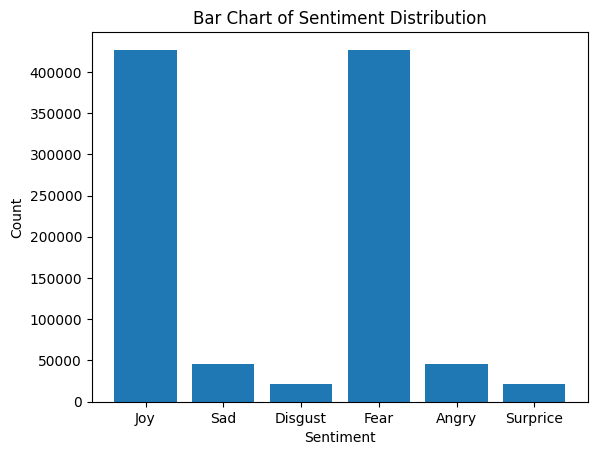

In [38]:
import matplotlib.pyplot as plt

label_0_data = df7[df7["Category"] == 'Joy']
label_1_data = df7[df7["Category"] == 'Sad']
label_2_data = df7[df7["Category"] == 'Disgust']
label_3_data = df7[df7["Category"] == 'Fear']
label_4_data = df7[df7["Category"] == 'Angry']
label_5_data = df7[df7["Category"] == 'Surprice']


label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)
label_3_size = len(label_0_data)
label_4_size = len(label_1_data)
label_5_size = len(label_2_data)

labels = ['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']
sizes = [label_0_size, label_1_size, label_2_size, label_3_size, label_4_size, label_5_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()

In [39]:
df7 = df7[(df7['Text'].str.len() >= 1) & (df7['Text'].str.len() <= 200)]
df7

Text Category
0        assalam alikum ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫ ÿßŸæŸÜ€í ...      Joy
19       best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ŸàÿßÿØ€Å ÿ≥...      Joy
29       ‚Åß ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫ ŸÖÿ≥ŸÑŸÖ ŸÑ€å...      Joy
35                                          ‚Å¶‚Å© €Åÿß⁄∫ Ÿæÿ™€Å ⁄Ø€åÿß      Sad
47       Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å ÿ®Ÿàÿ≥€Å Ô∏èÿßŸêŸÇÿ±ÿßÿ±Ÿê ŸÖŸè...      Joy
...                                                    ...      ...
1047993  ⁄©⁄æ€åŸÑ ÿØŸÑ⁄Üÿ≥Ÿæ ŸÖÿ±ÿ≠ŸÑ€í ŸÖ€å⁄∫ ÿØÿßÿÆŸÑ €ÅŸà⁄Ø€åÿß ÿ™ÿ≠ŸÇ€åŸÇÿßÿ™ ⁄©ÿß ÿ¢ÿ∫ÿß...      Joy
1047994  ÿ¥⁄©ÿ± ŸÅ€åÿµŸÑ ÿ®⁄æÿßÿ¶€å ÿ¢Ÿæ ŸÜ€í ÿ®⁄æ€åŸÜÿ≥ ÿπŸÖÿßÿ± ŸÖÿ≥ÿπŸàÿØ ⁄©€Åÿß ŸÖÿ¨⁄æ€í...      Joy
1047995                 ÿ®ÿßÿ™€å⁄∫ ⁄à€åŸÅŸÜÿ≥ ŸàÿßŸÑ€å ÿßŸàŸÇÿßÿ™ ÿ¥ÿß€ÅÿØÿ±€í ŸàÿßŸÑ€å      Joy
1047997  ÿ≥€åÿßÿ≥ÿ™ÿØÿßŸÜ ÿ¨ÿ™ŸÜ€å ÿ®⁄æ€å ⁄©Ÿàÿ¥ÿ¥€å⁄∫ ŸÖŸÑ⁄© ÿ≥ŸÑÿßŸÖÿ™€å ŸÜŸÇÿµÿßŸÜ ŸÜ€Å€å⁄∫...      Joy
1047999                 Ÿà€å⁄à€åŸà ŸÜÿß ÿ®⁄æ€å ÿ≥⁄©ÿ±€åŸÜ ÿ¥ÿßŸπÿ≥ ŸÑÿßÿ≤ŸÖ€å €ÅŸàŸÜ€í      Joy

[495292 rows x 2 columns]

In [40]:
category_counts = df7['Category'].value_counts()

# Print the counts for each category
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         422293
Sad          44957
Disgust      21450
Angry         2974
Fear          2242
Surprice      1376
Name: Category, dtype: int64


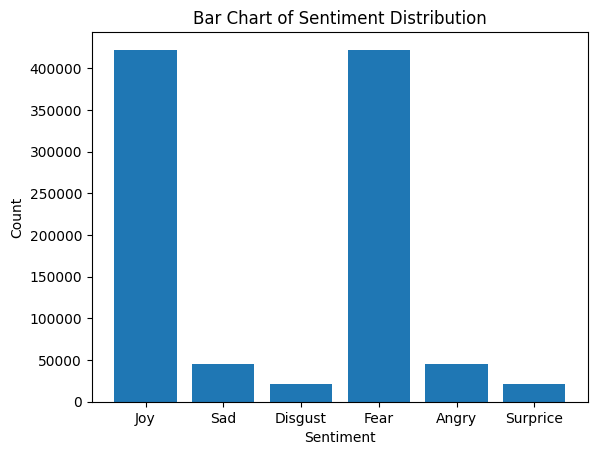

In [41]:
import matplotlib.pyplot as plt

label_0_data = df7[df7["Category"] == 'Joy']
label_1_data = df7[df7["Category"] == 'Sad']
label_2_data = df7[df7["Category"] == 'Disgust']
label_3_data = df7[df7["Category"] == 'Fear']
label_4_data = df7[df7["Category"] == 'Angry']
label_5_data = df7[df7["Category"] == 'Surprice']


label_0_size = len(label_0_data)
label_1_size = len(label_1_data)
label_2_size = len(label_2_data)
label_3_size = len(label_0_data)
label_4_size = len(label_1_data)
label_5_size = len(label_2_data)

labels = ['Joy', 'Sad', 'Disgust', 'Fear', 'Angry', 'Surprice']
sizes = [label_0_size, label_1_size, label_2_size, label_3_size, label_4_size, label_5_size]

plt.bar(labels, sizes)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Bar Chart of Sentiment Distribution')
plt.show()

## Oversampling

In [42]:
pip install -U imbalanced-learn


     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 235.6/235.6 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


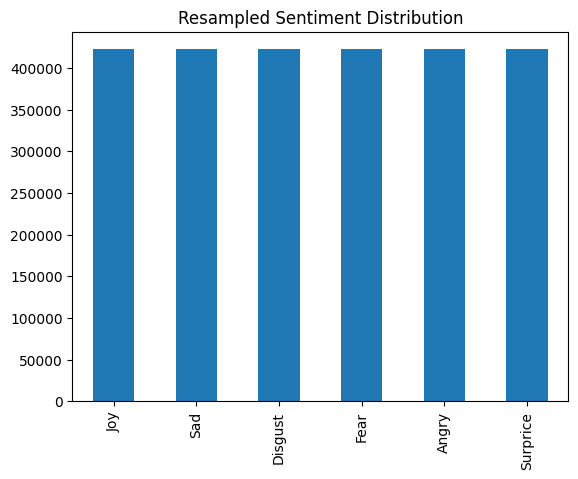

In [43]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
X = df7[['Text']]
y = df7['Category']
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['Text']), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)
df_resampled['Category'].value_counts().plot(kind='bar', title='Resampled Sentiment Distribution')
plt.show()


#Undersampling

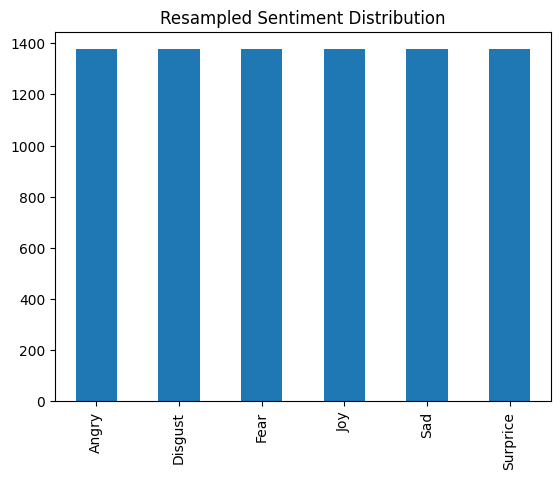

In [44]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

X = df7[['Text']]
y = df7['Category']

undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=['Text']), pd.DataFrame(y_resampled, columns=['Category'])], axis=1)
df_resampled['Category'].value_counts().plot(kind='bar', title='Resampled Sentiment Distribution')
plt.show()


In [47]:
df_resampled

Text  Category
836328                              ÿßÿ≥ ŸÖŸÑ⁄© ÿ®⁄©€å ÿπÿØÿßŸÑÿ™€å⁄∫ €î€î€î     Angry
1010001  ÿßŸà€åÿ≥ ŸÜŸàÿ±ÿßŸÜ€å ŸÖŸÑ⁄© ÿ™Ÿà⁄ëŸÜ€í ÿ®€åÿßŸÜ ÿÆŸÑÿßŸÅ ÿ≠⁄©ŸàŸÖÿ™ ŸàŸÇÿ™ ÿ≥€í ÿß...     Angry
761873             ŸÜŸàÿ¥€å ⁄Ø€åŸÑÿßŸÜ€å ÿµÿßÿ≠ÿ®€Å ÿ®ÿØÿ®ÿÆÿ™ ÿßŸæŸÜ€å ÿßŸàŸÇÿßÿ™ ÿ¢⁄Øÿ¶€í     Angry
208939   ÿßŸàŸà Ÿæÿßÿ¶€å ÿ¨ÿßŸÜ ÿ®Ÿàÿ¨⁄æ ŸÑ⁄©⁄æÿß €ÅÿßŸÜŸà⁄∫ ŸÖÿßŸÜŸà⁄∫ ŸÖÿπÿßŸÅ ⁄©ÿ±ÿØ€åŸà ...     Angry
634548        ÿ®€Åÿ™ ŸÜÿßÿßŸÜÿµÿßŸÅ€å ŸÖÿπÿµŸàŸÖ ÿ∑Ÿàÿ®€å ÿ®ŸÑÿß⁄© ÿØ€åÿß ÿßÿ≥ ⁄©ŸÖŸæŸÜ€å ŸÜ€í     Angry
...                                                    ...       ...
1042080  €ÅŸÖ ÿ™ŸÄÿ±€í ÿ®ÿπŸÄÿØ ⁄ØŸÄÿ±€í ÿÆÿ≥ÿ™€Å ŸÖ⁄©ÿßŸÜŸÄŸà⁄∫ ⁄©ŸÄ€å ÿ∑ŸÄÿ±ÿ≠ ⁄©Ÿê⁄æ⁄ë⁄©€å...  Surprice
1042847                                          ŸàŸÅÿßÿ™ ÿßÿ≥⁄©€å  Surprice
1043435                              €Åÿßÿ™⁄æ ÿ®⁄æ€å Ÿæ⁄©⁄ëÿß ÿ™⁄æÿß ⁄©€åÿß  Surprice
1046016  16 ÿß⁄©ÿ™Ÿàÿ®ÿ± ⁄©ÿß ÿ¨ŸÑÿ≥€Å ⁄©ÿßŸÖ€åÿßÿ® ⁄©ÿ±ŸÜÿß ÿ®€å⁄ØŸÖ ÿµŸÅÿØÿ± ⁄©ÿß ÿßÿ¶Ÿπ...  Surprice
1047287  ÿßŸÜÿ¥ÿßÿ° ÿßŸÑŸÑ€Å ŸÖÿßÿ±Ÿà€å ÿ≥ÿ±ŸÖÿØ €î€î€î€î€î ⁄©€åÿ≥€í €î€î€î€î €î€î€î€î ⁄©€Åÿß...  Surprice

[8256 rows x 2 columns]

In [49]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
df_resampled['label'] = df_resampled['Category'].map(category_mapping)

In [50]:
df_resampled

Text  Category  label
836328                              ÿßÿ≥ ŸÖŸÑ⁄© ÿ®⁄©€å ÿπÿØÿßŸÑÿ™€å⁄∫ €î€î€î     Angry      4
1010001  ÿßŸà€åÿ≥ ŸÜŸàÿ±ÿßŸÜ€å ŸÖŸÑ⁄© ÿ™Ÿà⁄ëŸÜ€í ÿ®€åÿßŸÜ ÿÆŸÑÿßŸÅ ÿ≠⁄©ŸàŸÖÿ™ ŸàŸÇÿ™ ÿ≥€í ÿß...     Angry      4
761873             ŸÜŸàÿ¥€å ⁄Ø€åŸÑÿßŸÜ€å ÿµÿßÿ≠ÿ®€Å ÿ®ÿØÿ®ÿÆÿ™ ÿßŸæŸÜ€å ÿßŸàŸÇÿßÿ™ ÿ¢⁄Øÿ¶€í     Angry      4
208939   ÿßŸàŸà Ÿæÿßÿ¶€å ÿ¨ÿßŸÜ ÿ®Ÿàÿ¨⁄æ ŸÑ⁄©⁄æÿß €ÅÿßŸÜŸà⁄∫ ŸÖÿßŸÜŸà⁄∫ ŸÖÿπÿßŸÅ ⁄©ÿ±ÿØ€åŸà ...     Angry      4
634548        ÿ®€Åÿ™ ŸÜÿßÿßŸÜÿµÿßŸÅ€å ŸÖÿπÿµŸàŸÖ ÿ∑Ÿàÿ®€å ÿ®ŸÑÿß⁄© ÿØ€åÿß ÿßÿ≥ ⁄©ŸÖŸæŸÜ€å ŸÜ€í     Angry      4
...                                                    ...       ...    ...
1042080  €ÅŸÖ ÿ™ŸÄÿ±€í ÿ®ÿπŸÄÿØ ⁄ØŸÄÿ±€í ÿÆÿ≥ÿ™€Å ŸÖ⁄©ÿßŸÜŸÄŸà⁄∫ ⁄©ŸÄ€å ÿ∑ŸÄÿ±ÿ≠ ⁄©Ÿê⁄æ⁄ë⁄©€å...  Surprice      5
1042847                                          ŸàŸÅÿßÿ™ ÿßÿ≥⁄©€å  Surprice      5
1043435                              €Åÿßÿ™⁄æ ÿ®⁄æ€å Ÿæ⁄©⁄ëÿß ÿ™⁄æÿß ⁄©€åÿß  Surprice      5
1046016  16 ÿß⁄©ÿ™Ÿàÿ®ÿ± ⁄©ÿß ÿ¨ŸÑÿ≥€Å ⁄©ÿßŸÖ€åÿßÿ® ⁄©ÿ±ŸÜÿß ÿ®€å⁄ØŸÖ ÿµŸÅÿØÿ± ⁄©ÿß ÿßÿ¶Ÿπ...  Surprice      5
1047287  ÿßŸÜÿ¥ÿßÿ° ÿßŸÑŸÑ€Å ŸÖÿßÿ±Ÿà€å ÿ≥ÿ±ŸÖÿØ €î€î€î€î€î ⁄©€åÿ≥€í €î€î€î€î €î€î€î€î ⁄©€Åÿß...  Surprice      5

[8256 rows x 3 columns]

In [53]:
df_resampled.to_csv('undersampled_pp_data.csv', index=False)

In [ ]:
category_counts = df_resampled['Category'].value_counts()
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         422293
Sad         422293
Disgust     422293
Fear        422293
Angry       422293
Surprice    422293
Name: Category, dtype: int64


In [ ]:
df_resampled

Text  Category
0        assalam alikum ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫ ÿßŸæŸÜ€í ...       Joy
1        best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ŸàÿßÿØ€Å ÿ≥...       Joy
2        ‚Åß ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å© ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫ ŸÖÿ≥ŸÑŸÖ ŸÑ€å...       Joy
3                                           ‚Å¶‚Å© €Åÿß⁄∫ Ÿæÿ™€Å ⁄Ø€åÿß       Sad
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å ÿ®Ÿàÿ≥€Å Ô∏èÿßŸêŸÇÿ±ÿßÿ±Ÿê ŸÖŸè...       Joy
...                                                    ...       ...
2533753                                         ÿßÿ™ŸÜÿß ⁄Ü⁄æŸàŸπÿß  Surprice
2533754  ⁄©⁄æÿßŸÜÿß ÿ≤ŸÖ€åŸÜ ⁄©ŸÖÿ± ŸÖ€å⁄∫ ÿØÿ±ÿØ ŸÜŸÖÿßÿ≤ Ÿæ⁄ë⁄æŸÜ€í ⁄©ÿ±ÿ≥€å ŸÜ€Å€å⁄∫ ÿ¨ÿß...  Surprice
2533755                   please help ÿßÿ≥⁄©ÿß ÿ¨Ÿàÿßÿ® ŸæŸÜÿ¨ÿßÿ®€å ŸÖ€å⁄∫  Surprice
2533756                                               ŸÜ€Å€å⁄∫  Surprice
2533757           ÿ®€Åÿ™ÿ±€åŸÜ ŸÖ€å⁄∫ ÿ®⁄æ€å ÿ®ÿØÿ™ÿ±€åŸÜ Ÿàÿß€Å ŸÇÿ≥ŸÖÿ™ €î€î€î€î€î€î€î€î€î  Surprice

[2533758 rows x 2 columns]

# Data Sampling

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
categories = df_resampled['Category'].unique()
sampled_df = pd.DataFrame()
for category in categories:
    category_data = df_resampled[df_resampled['Category'] == category]
    if len(category_data) > 0:
        sampled_data, _ = train_test_split(category_data, test_size=(1 - 2180/len(category_data)), random_state=42, stratify=category_data['Category'])
        sampled_df = pd.concat([sampled_df, sampled_data])
sampled_df.reset_index(drop=True, inplace=True)
sampled_df


Text  Category
0      ŸπŸàÿ¶Ÿπÿ± ÿ≥Ÿà ÿ≥€í ÿ≤€åÿßÿØ€Å ŸÜŸàÿßÿ≤ ÿ¥ÿ±€åŸÅ ÿ∏ÿß€Åÿ± ŸÖÿ±€åŸÖ ÿ®⁄æ€å Ÿæÿ±€åÿ¥...       Joy
1                            ŸÖ€Åÿ± ÿµÿßÿ≠ÿ® ÿß€å⁄∫ ÿßŸæŸÜÿß ÿ∫ÿØÿßÿ±€å ÿ±€åÿß       Joy
2                                   ÿ™ŸÖ ÿ®⁄æ€å ŸÖ€åÿ±€å ÿ®⁄æ€å ŸÖ€åÿ±€å       Joy
3                     ⁄Üÿß €ÅŸÜ€í ŸàÿßŸÑŸà⁄∫ ÿ®ÿ™ÿß ÿ§ ÿπÿ≤ÿ™€å⁄∫ ÿßŸÑŸÑ€Å ÿØ€åÿ™ÿß       Joy
4                                    ÿ±ŸàŸπ€å ÿØÿß ÿßŸÜÿ™ÿ∏ÿßŸÖ €Å€å⁄Øÿß       Joy
...                                                  ...       ...
13075  Ÿæÿ™€Å ŸÜ€Å€å⁄∫ ÿß€åÿ≥€í ŸÜ€Å€å⁄∫ ÿ±€Åÿß ÿ¨€åÿ≥€í ŸÜ⁄©€í ŸÜ⁄©€í ÿßÿ®€í ⁄©ÿß ⁄Ø€åŸÜ...  Surprice
13076           ÿßÿ™ŸÜ€å ÿ®ÿßÿ± ⁄æÿß⁄æÿß⁄æÿß⁄æÿß⁄æÿß ŸÖ€å⁄∫ ⁄ØŸÜ ÿ®⁄æ€å ŸÜ€Å€å⁄∫ ŸæÿßŸ∏€å  Surprice
13077                                    ⁄©€åÿß €ÅŸà⁄Ø€åÿß ÿπÿ®€åÿ±€Å  Surprice
13078  ÿßŸæŸÜ€å ÿ≠ÿ±⁄©ÿ™Ÿà⁄∫ ÿ≥€í ÿ®ÿßÿ≤ ŸÜ€Å€å⁄∫ ÿ±€Åÿß ⁄ØŸÜÿØ€í ÿ≥Ÿàÿ± ŸÜÿß ÿ¨ÿßÿ¶ÿ≤ ÿß...  Surprice
13079  ŸÖ€åÿ±€å ÿπŸÜ⁄ØŸÑÿ¥ ÿ®€Åÿ™ ŸÇŸÖÿ≤Ÿàÿ± ŸÖÿ¨⁄æ€í ŸÇ€åÿß ŸÇÿ±ŸÜÿß ⁄Üÿß€Å€å€í ÿ≥Ÿà⁄Ü⁄©ÿß...  Surprice

[13080 rows x 2 columns]

In [ ]:
category_counts = sampled_df['Category'].value_counts()
print("Category Counts:")
print(category_counts)

Category Counts:
Joy         2180
Sad         2180
Disgust     2180
Fear        2180
Angry       2180
Surprice    2180
Name: Category, dtype: int64


In [ ]:
import pandas as pd
nan_counts = sampled_df.isna().sum()
print(nan_counts)

Text        0
Category    0
dtype: int64


#Label the category

In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
sampled_df['label'] = sampled_df['Category'].map(category_mapping)

In [ ]:
sampled_df

Text  Category  label
0      ŸπŸàÿ¶Ÿπÿ± ÿ≥Ÿà ÿ≥€í ÿ≤€åÿßÿØ€Å ŸÜŸàÿßÿ≤ ÿ¥ÿ±€åŸÅ ÿ∏ÿß€Åÿ± ŸÖÿ±€åŸÖ ÿ®⁄æ€å Ÿæÿ±€åÿ¥...       Joy      0
1                            ŸÖ€Åÿ± ÿµÿßÿ≠ÿ® ÿß€å⁄∫ ÿßŸæŸÜÿß ÿ∫ÿØÿßÿ±€å ÿ±€åÿß       Joy      0
2                                   ÿ™ŸÖ ÿ®⁄æ€å ŸÖ€åÿ±€å ÿ®⁄æ€å ŸÖ€åÿ±€å       Joy      0
3                     ⁄Üÿß €ÅŸÜ€í ŸàÿßŸÑŸà⁄∫ ÿ®ÿ™ÿß ÿ§ ÿπÿ≤ÿ™€å⁄∫ ÿßŸÑŸÑ€Å ÿØ€åÿ™ÿß       Joy      0
4                                    ÿ±ŸàŸπ€å ÿØÿß ÿßŸÜÿ™ÿ∏ÿßŸÖ €Å€å⁄Øÿß       Joy      0
...                                                  ...       ...    ...
13075  Ÿæÿ™€Å ŸÜ€Å€å⁄∫ ÿß€åÿ≥€í ŸÜ€Å€å⁄∫ ÿ±€Åÿß ÿ¨€åÿ≥€í ŸÜ⁄©€í ŸÜ⁄©€í ÿßÿ®€í ⁄©ÿß ⁄Ø€åŸÜ...  Surprice      5
13076           ÿßÿ™ŸÜ€å ÿ®ÿßÿ± ⁄æÿß⁄æÿß⁄æÿß⁄æÿß⁄æÿß ŸÖ€å⁄∫ ⁄ØŸÜ ÿ®⁄æ€å ŸÜ€Å€å⁄∫ ŸæÿßŸ∏€å  Surprice      5
13077                                    ⁄©€åÿß €ÅŸà⁄Ø€åÿß ÿπÿ®€åÿ±€Å  Surprice      5
13078  ÿßŸæŸÜ€å ÿ≠ÿ±⁄©ÿ™Ÿà⁄∫ ÿ≥€í ÿ®ÿßÿ≤ ŸÜ€Å€å⁄∫ ÿ±€Åÿß ⁄ØŸÜÿØ€í ÿ≥Ÿàÿ± ŸÜÿß ÿ¨ÿßÿ¶ÿ≤ ÿß...  Surprice      5
13079  ŸÖ€åÿ±€å ÿπŸÜ⁄ØŸÑÿ¥ ÿ®€Åÿ™ ŸÇŸÖÿ≤Ÿàÿ± ŸÖÿ¨⁄æ€í ŸÇ€åÿß ŸÇÿ±ŸÜÿß ⁄Üÿß€Å€å€í ÿ≥Ÿà⁄Ü⁄©ÿß...  Surprice      5

[13080 rows x 3 columns]

In [ ]:
sampled_df.to_csv('Urdu_sampled_dataset.csv', index=False)

In [ ]:
pp_ds_token =pd.read_csv("/content/drive/MyDrive/DS_CSE 438/UrduDataset/oversampled_pp_data.csv")

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer

pp_ds_token['Text'] = pp_ds_token['Text'].astype(str)

urdu_tokenizer = RegexpTokenizer(r'\w+')
pp_ds_token['Text'] = pp_ds_token['Text'].apply(lambda text: urdu_tokenizer.tokenize(text))

In [ ]:
pp_ds_token

Text  Category
0        [assalam, alikum, ÿß€í, ÿß€åŸÖÿßŸÜ, ŸàÿßŸÑŸà, ŸÖ€åÿ±€í, ÿØÿ¥ŸÖŸÜŸà...       Joy
1        [best, lines, ÿ≤ŸÖÿß, ÿØ€Å, ŸÖŸÑ⁄Øÿ±Ÿà⁄∫, ÿ≤ŸÖ€Å, ÿß, ŸÖÿ±€Å, ÿ≤ÿß...       Joy
2        [ÿ™ŸÜÿ∏€åŸÖ, ÿ≥ÿßÿ≤€å, ⁄©€í, ŸÑ€å€í, ÿ∑ŸÑÿßŸÑ, ⁄ÜŸà€ÅÿØÿ±€å, ⁄©€å, ŸÇÿ±ÿ®ÿßŸÜ...       Joy
3                                  [€Åÿß⁄∫, ÿ≥ÿ®, Ÿæÿ™€Å, ŸÑ⁄Ø, ⁄Ø€åÿß]       Sad
4        [ŸÖ, ÿ¨⁄æ€í, Ÿæ, ÿ≥ŸÜÿØ, €Å€í, ÿ™, ŸÖ⁄æÿßÿ±€å, Ÿæ, €åÿ¥ÿßŸÜ€å, Ÿæÿ±, ÿ®...       Joy
...                                                    ...       ...
2560837  [ÿ™ÿ≥€å, ÿ≥€åŸÑÿ®ÿ±Ÿπ€å, ŸÑŸà⁄Ø, €Å€å, ÿ≥ŸÖÿ¨⁄æÿßÿ§, €ÅŸÖÿßÿ±€å, ⁄©ŸàŸÜ, ÿ≥ŸÜÿ™ÿß]  Surprice
2560838              [€å€Å, ⁄©ŸàŸÜ, €Å€í, ÿ¨ÿ≥, ŸÜ€í, ÿ®ŸÑÿß⁄©, ⁄©€åÿß, €ÅŸàÿß]  Surprice
2560839                  [Ÿà€åÿ≥€í, ÿßŸÜ⁄©ÿß, ⁄©⁄Ü⁄æ, Ÿæÿ™€Å, ÿ®⁄æ€å, ŸÜ€Å€å⁄∫]  Surprice
2560840  [⁄©Ÿàÿ¶€å, €Å€í, ÿßÿØ⁄æÿ±, ÿßŸÜ⁄©ÿß, ⁄©ŸÑÿßÿ≥, ŸÅ€åŸÑŸà, ÿ¨ÿ≥, ÿ≥€í, €å€Å,...  Surprice
2560841                 [ÿßŸàÿ±, ÿ≥ÿ±⁄ØŸπ, ÿ®⁄æ€å, ÿßÿ™ÿß, ŸÖ€ÅŸÜ⁄Øÿß, ŸàÿßŸÑÿß]  Surprice

[2560842 rows x 2 columns]

In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
pp_ds_token['label'] = pp_ds_token['Category'].map(category_mapping)

In [ ]:
pp_ds_token

Text  Category  label
0        [assalam, alikum, ÿß€í, ÿß€åŸÖÿßŸÜ, ŸàÿßŸÑŸà, ŸÖ€åÿ±€í, ÿØÿ¥ŸÖŸÜŸà...       Joy      0
1        [best, lines, ÿ≤ŸÖÿß, ÿØ€Å, ŸÖŸÑ⁄Øÿ±Ÿà⁄∫, ÿ≤ŸÖ€Å, ÿß, ŸÖÿ±€Å, ÿ≤ÿß...       Joy      0
2        [ÿ™ŸÜÿ∏€åŸÖ, ÿ≥ÿßÿ≤€å, ⁄©€í, ŸÑ€å€í, ÿ∑ŸÑÿßŸÑ, ⁄ÜŸà€ÅÿØÿ±€å, ⁄©€å, ŸÇÿ±ÿ®ÿßŸÜ...       Joy      0
3                                  [€Åÿß⁄∫, ÿ≥ÿ®, Ÿæÿ™€Å, ŸÑ⁄Ø, ⁄Ø€åÿß]       Sad      1
4        [ŸÖ, ÿ¨⁄æ€í, Ÿæ, ÿ≥ŸÜÿØ, €Å€í, ÿ™, ŸÖ⁄æÿßÿ±€å, Ÿæ, €åÿ¥ÿßŸÜ€å, Ÿæÿ±, ÿ®...       Joy      0
...                                                    ...       ...    ...
2560837  [ÿ™ÿ≥€å, ÿ≥€åŸÑÿ®ÿ±Ÿπ€å, ŸÑŸà⁄Ø, €Å€å, ÿ≥ŸÖÿ¨⁄æÿßÿ§, €ÅŸÖÿßÿ±€å, ⁄©ŸàŸÜ, ÿ≥ŸÜÿ™ÿß]  Surprice      5
2560838              [€å€Å, ⁄©ŸàŸÜ, €Å€í, ÿ¨ÿ≥, ŸÜ€í, ÿ®ŸÑÿß⁄©, ⁄©€åÿß, €ÅŸàÿß]  Surprice      5
2560839                  [Ÿà€åÿ≥€í, ÿßŸÜ⁄©ÿß, ⁄©⁄Ü⁄æ, Ÿæÿ™€Å, ÿ®⁄æ€å, ŸÜ€Å€å⁄∫]  Surprice      5
2560840  [⁄©Ÿàÿ¶€å, €Å€í, ÿßÿØ⁄æÿ±, ÿßŸÜ⁄©ÿß, ⁄©ŸÑÿßÿ≥, ŸÅ€åŸÑŸà, ÿ¨ÿ≥, ÿ≥€í, €å€Å,...  Surprice      5
2560841                 [ÿßŸàÿ±, ÿ≥ÿ±⁄ØŸπ, ÿ®⁄æ€å, ÿßÿ™ÿß, ŸÖ€ÅŸÜ⁄Øÿß, ŸàÿßŸÑÿß]  Surprice      5

[2560842 rows x 3 columns]

#EDA

## Basics descriptive Statics

In [ ]:
pp_ds =pd.read_csv("/content/drive/MyDrive/DS_CSE 438/Dataset/UrduDataset/oversampled_pp_data.csv")

In [ ]:
pp_ds

Text  Category
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy
...                                                    ...       ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice

[2560842 rows x 2 columns]

Number of Documents: 2560842
Average Document Length: 69.78 characters
Minimum Document Length: 1 characters
Maximum Document Length: 734 characters


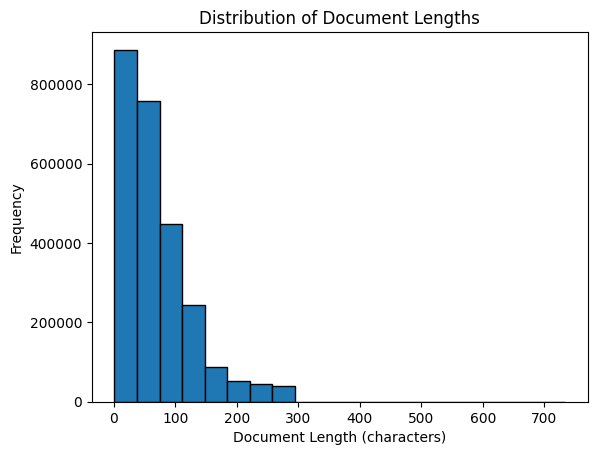

In [ ]:
import matplotlib.pyplot as plt


text_lengths = pp_ds['Text'].apply(lambda x: len(str(x)) if isinstance(x, (str, float)) else 0)


num_documents = len(pp_ds)
average_length = text_lengths.mean()
min_length = text_lengths.min()
max_length = text_lengths.max()


print(f"Number of Documents: {num_documents}")
print(f"Average Document Length: {average_length:.2f} characters")
print(f"Minimum Document Length: {min_length} characters")
print(f"Maximum Document Length: {max_length} characters")


plt.hist(text_lengths, bins=20, edgecolor='black')
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk

nltk.download('punkt')

def preprocess_text(text):
    return str(text).lower()

pp_ds['Text'] = pp_ds['Text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most Common Words:
€Å€í: 954464 times
ŸÖ€å⁄∫: 808223 times
⁄©€í: 707952 times
⁄©€å: 673220 times
ÿ≥€í: 567885 times
ÿ™Ÿà: 552844 times
ŸÜ€Å€å⁄∫: 538356 times
⁄©Ÿà: 509659 times
ÿßŸàÿ±: 449689 times
€Å€å⁄∫: 446050 times

Least Common Words:
ÿ±⁄©€ÅŸÑ€í: 1 times
ÿ≥ŸêŸÜ⁄ØŸÖ: 1 times
ÿµÿ≠ÿ™‚Ä¶: 1 times
€Å€í€î€îÿ≤ÿ±ÿß: 1 times
ÿ¢ÿ¶€í€îÿßŸàÿ±: 1 times
ÿßÿ®Ÿàÿ∑ÿßŸÑÿ®ÿë: 1 times
⁄Ü€Å€å⁄Ü⁄ë€åÿß⁄∫: 1 times
⁄Ø⁄æŸàŸÜ⁄ÜŸà⁄∫: 1 times
ÿ®ÿßÿØÿ¥ÿß⁄æ: 1 times
ÿ®ÿßÿØÿ¥ÿß⁄æ€å: 1 times


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1729 (\N{ARABIC LETTER HEH GOAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Matplotlib currently does not support Arabic natively.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 1746 (\N{ARABIC LETTER YEH BARREE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


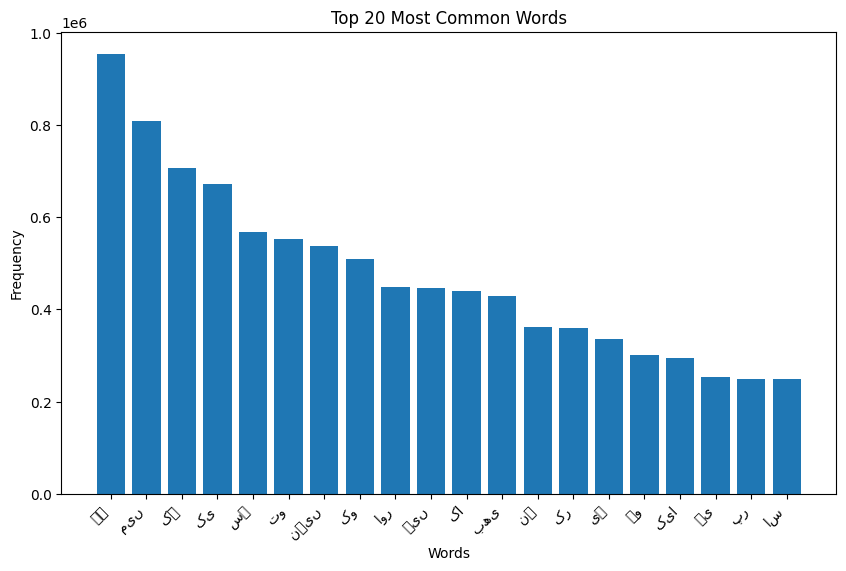

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')

all_words = pp_ds['Text'].apply(nltk.word_tokenize).explode()


word_frequencies = Counter(all_words)


print("Most Common Words:")
for word, frequency in word_frequencies.most_common(10):
    print(f"{word}: {frequency} times")

print("\nLeast Common Words:")
for word, frequency in word_frequencies.most_common()[:-11:-1]:
    print(f"{word}: {frequency} times")

plt.figure(figsize=(10, 6))
plt.bar(*zip(*word_frequencies.most_common(20)))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


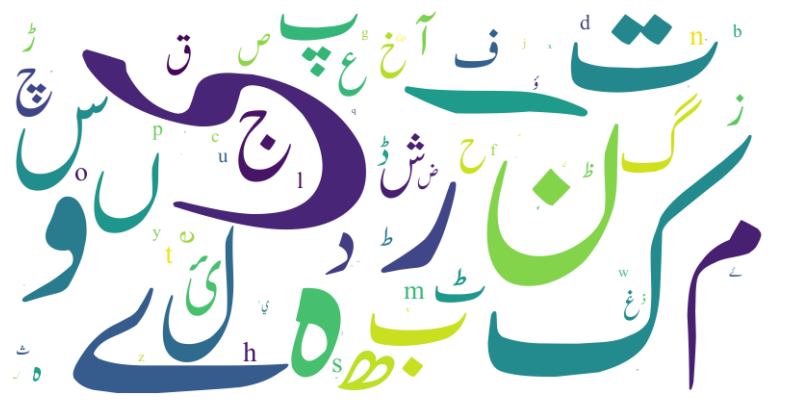

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_0_data = pp_ds[pp_ds['Category'] == 'Joy']
urdu_text = ' '.join(map(str, label_0_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


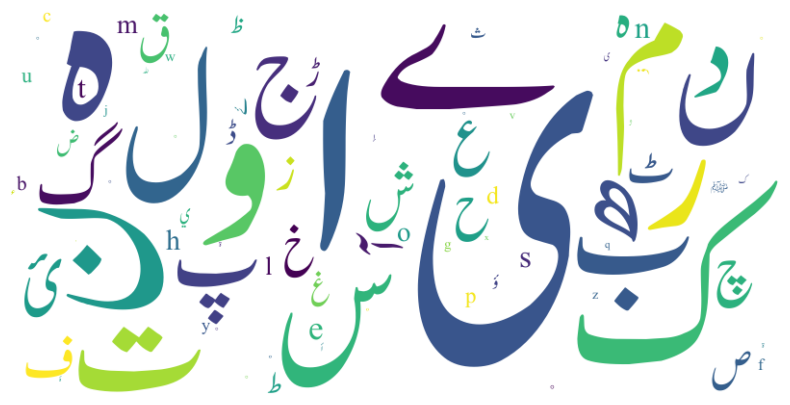

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Sad']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


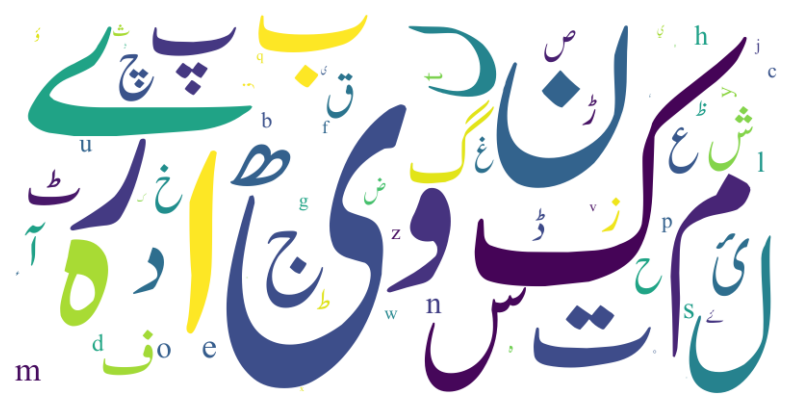

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Fear']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


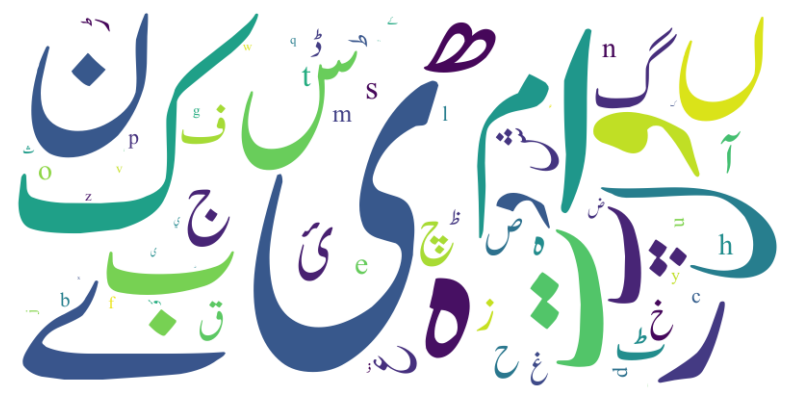

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Surprice']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


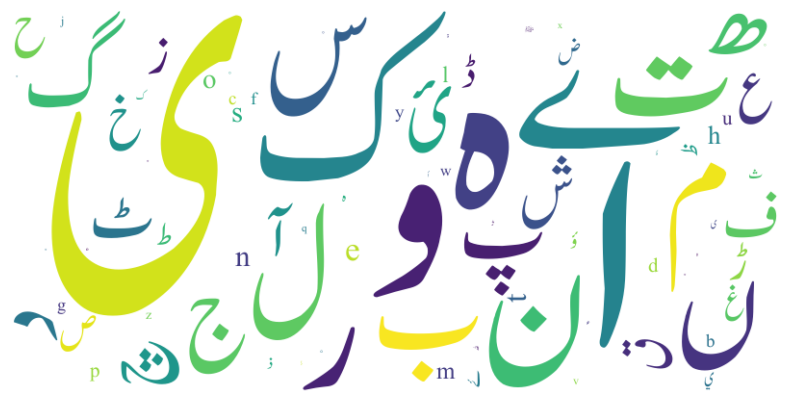

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import os

font_filename = "/content/drive/MyDrive/NLP1_CSE431/for_urdu_1st_paper/urdu_dataset/Jameel Noori Nastaleeq.ttf"
font_path = os.path.abspath(font_filename)
label_1_data = pp_ds[pp_ds['Category'] == 'Disgust']
urdu_text = ' '.join(map(str, label_1_data['Text'].apply(lambda x: ' '.join(x))))

wordcloud = WordCloud(
    width=800,
    height=400,
    font_path=font_path,
    background_color='white',
    collocations=False
).generate(urdu_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
pp_ds.groupby("Category").describe()

Text                                                             \
           count  unique                                                top   
Category                                                                      
Angry     426807    3053  €åÿßÿØ ÿ±€Å€í ⁄©€Å ÿ¢ÿ¨ ⁄©ÿß ÿØŸÜ ÿ≥ÿßŸÜÿ≠€Å ⁄©ÿßÿ±ÿ≥ÿßÿ≤ ⁄©€å €åÿßÿØ ŸÖ€å⁄∫ ŸÖŸÜ...   
Disgust   426807   21642  ÔÆêÔ∫íÔÆ≠ÔØΩ Ô∫ÅÔªßÔÆëÔÆ≠ÔªÆÔÆû Ôª£ÔØøÔÆü Ô∫üÔª†Ôª¶ ÔÆ®ÔªÆ Ô∫óÔªÆ ÔÆîÔÆ≠Ô∫Æ Ô≠òÔÆß ÔÆêÔ∫¥ÔØΩ ÔÆêÔªÆ Ô∫ëÔÆ≠ÔØΩ Ôª£Ô∫ñ...   
Fear      426807    2312                   ŸÖÿ∑ŸÑÿ® ÿßÿ® ŸÑÿßÿ≤ŸÖ€å ŸÑÿßŸÜÿß Ÿæ⁄ë€å⁄Øÿß ÿ®€ÅŸÜ ⁄©Ÿà    
Joy       426805  426805       assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...   
Sad       426807   45893                                 ŸÖ€åÿ±€å Ÿà€å ŸÜ€å⁄∫ €ÅŸà ÿ±€Å€å   
Surprice  426807    1397                                          €Å€í ÿ®⁄Ø⁄æŸàÿßŸÜ   

               
         freq  
Category       
Angry     187  
Disgust    39  
Fear      236  
Joy         1  
Sad        24  
Surprice  364

In [ ]:
pp_ds

Text  Category
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy
...                                                    ...       ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice

[2560842 rows x 2 columns]

In [ ]:
category_mapping = {'Joy': 0, 'Sad': 1, 'Disgust': 2, 'Fear': 3, 'Angry': 4, 'Surprice': 5}
pp_ds['label'] = pp_ds['Category'].map(category_mapping)

In [ ]:
pp_ds

Text  Category  label
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy      0
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy      0
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy      0
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad      1
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy      0
...                                                    ...       ...    ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice      5
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice      5
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice      5
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice      5
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice      5

[2560842 rows x 3 columns]

In [ ]:
category_counts = pp_ds['Category'].value_counts()
print(category_counts)

Joy         426807
Sad         426807
Disgust     426807
Fear        426807
Angry       426807
Surprice    426807
Name: Category, dtype: int64


In [ ]:
na_count = pp_ds['label'].isna().sum()
na_count1 = pp_ds['Category'].isna().sum()
na_count2 = pp_ds['Text'].isna().sum()

print("Number of NaN values in the 'Label' column:", na_count)
print("Number of NaN values in the 'Catagory' column:", na_count1)
print("Number of NaN values in the 'Text' column:", na_count2)


Number of NaN values in the 'Label' column: 0
Number of NaN values in the 'Catagory' column: 0
Number of NaN values in the 'Text' column: 2


In [ ]:
pp_ds = pp_ds.dropna()
pp_ds

Text  Category  label
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy      0
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy      0
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy      0
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad      1
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy      0
...                                                    ...       ...    ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice      5
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice      5
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice      5
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice      5
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice      5

[2560840 rows x 3 columns]

In [ ]:
na_count = pp_ds['label'].isna().sum()
na_count1 = pp_ds['Category'].isna().sum()
na_count2 = pp_ds['Text'].isna().sum()

print("Number of NaN values in the 'Label' column:", na_count)
print("Number of NaN values in the 'Catagory' column:", na_count1)
print("Number of NaN values in the 'Text' column:", na_count2)


Number of NaN values in the 'Label' column: 0
Number of NaN values in the 'Catagory' column: 0
Number of NaN values in the 'Text' column: 0


In [ ]:
pp_ds

Text  Category  label
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy      0
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy      0
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy      0
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad      1
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy      0
...                                                    ...       ...    ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice      5
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice      5
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice      5
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice      5
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice      5

[2560840 rows x 3 columns]

In [ ]:
pp_ds = pp_ds[(pp_ds['Text'].str.len() >= 1) & (pp_ds['Text'].str.len() <= 300)]


In [ ]:
pp_ds

Text  Category  label
0             assalam alikum  ÿß€í ÿß€åŸÖÿßŸÜ ŸàÿßŸÑŸà ŸÖ€åÿ±€í ÿØÿ¥ŸÖŸÜŸà⁄∫...       Joy      0
1          best lines ÿ≤ŸÖÿß ÿØ€Å ŸÖŸÑ⁄Øÿ±Ÿà⁄∫ ÿ≤ŸÖ€Å ÿßŸèŸÖÿ±€Å ÿ≤ÿßŸÖŸÜ ÿØ€å Ÿà...       Joy      0
2        ‚Åß  ÿ™ŸÜÿ∏€åŸÖ ÿ≥ÿßÿ≤€å‚Å©  ⁄©€í ŸÑ€å€í ÿ∑ŸÑÿßŸÑ ⁄ÜŸà€ÅÿØÿ±€å ⁄©€å ŸÇÿ±ÿ®ÿßŸÜ€åÿß⁄∫...       Joy      0
3                                     ‚Å¶‚Å© €Åÿß⁄∫ ÿ≥ÿ® Ÿæÿ™€Å ŸÑ⁄Ø ⁄Ø€åÿß       Sad      1
4        Ô∏èŸÖŸèÿ¨⁄æ€í ŸæŸéÿ≥ŸÜÿØ €Å€í Ô∏èÿ™ŸèŸÖ⁄æÿßÿ±€å ŸæŸê€åÿ¥ÿßŸÜ€å Ÿæÿ± ÿ®Ÿàÿ≥€Å ÿØ€í ⁄©ÿ±...       Joy      0
...                                                    ...       ...    ...
2560837          ÿ™ÿ≥€å ÿ≥€åŸÑÿ®ÿ±Ÿπ€å ŸÑŸà⁄Ø €Å€å ÿ≥ŸÖÿ¨⁄æÿßÿ§ €ÅŸÖÿßÿ±€å ⁄©ŸàŸÜ ÿ≥ŸÜÿ™ÿß   Surprice      5
2560838                       €å€Å ⁄©ŸàŸÜ €Å€í ÿ¨ÿ≥ ŸÜ€í ÿ®ŸÑÿß⁄© ⁄©€åÿß €ÅŸàÿß  Surprice      5
2560839                        Ÿà€åÿ≥€í ÿßŸÜ⁄©ÿß ⁄©⁄Ü⁄æ Ÿæÿ™€Å ÿ®⁄æ€å ŸÜ€Å€å⁄∫€î  Surprice      5
2560840  ⁄©Ÿàÿ¶€å €Å€í ÿßÿØ⁄æÿ± ÿßŸÜ⁄©ÿß ⁄©ŸÑÿßÿ≥ ŸÅ€åŸÑŸà ÿ¨ÿ≥ ÿ≥€í €å€Å ⁄àÿ±ÿ™€å €ÅŸà⁄∫ ...  Surprice      5
2560841                       ÿßŸàÿ± ÿ≥ÿ±⁄ØŸπ ÿ®⁄æ€å ÿßÿ™ÿß ŸÖ€ÅŸÜ⁄Øÿß ŸàÿßŸÑÿß   Surprice      5

[2560833 rows x 3 columns]

In [ ]:
pp_ds.to_csv('Urdudatasetfinal.csv', index=False)